# Handwritten Digit Recognition using Convolutional Neural Networks

After learning how Convolutional Neural Networks (CNNs) operate, I implemented a deep learning model for handwritten digit recognition, using the MNIST dataset, to understand and apply CNNs to a classic image recognition task.

The MNIST dataset is the “hello world” of deep learning image classification, comprising 28x28-pixel grayscale images of handwritten digits, totaling 784 pixels per image. The data is split into 60,000 training images and 10,000 testing images, allowing for effective model evaluation.

In this project, CNNs automatically learn features from the image data through layers of convolution and pooling, capturing patterns specific to each digit. This model classifies 10 digits (0-9), making it a multi-class classification task. I used softmax activation in the final layer to output probabilities across these 10 classes.

**Statistics Concepts Applied:**

**Normalization**: To improve model performance, each pixel value is scaled to a [0, 1] range, converting raw pixel intensities into a normalized distribution. This standardization makes training faster and more stable.

**Cross-Entropy Loss:** To quantify model accuracy, cross-entropy loss is used as it measures the distance between the predicted probabilities and the actual labels, effectively penalizing incorrect predictions.

**Accuracy Metric:** Classification accuracy is the primary metric, defined as the ratio of correct predictions over total predictions. I report accuracy as well as prediction error, where prediction error = 1 - accuracy, to provide insights into the model's misclassification rate.

By leveraging CNNs with these statistical techniques, the model achieves near state-of-the-art performance in handwritten digit recognition, showcasing the power of deep learning in object recognition tasks.

## Load Data

The Keras deep learning library provides a convenience method for loading the MNIST dataset.

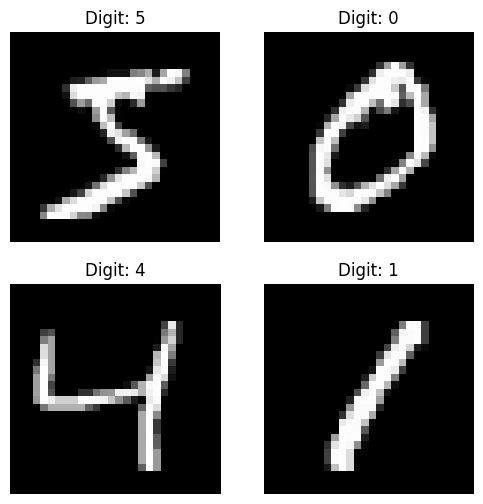

Epoch 1/10
300/300 - 57s - 189ms/step - accuracy: 0.9302 - loss: 0.2409 - val_accuracy: 0.9768 - val_loss: 0.0778
Epoch 2/10
300/300 - 83s - 275ms/step - accuracy: 0.9783 - loss: 0.0714 - val_accuracy: 0.9831 - val_loss: 0.0483
Epoch 3/10
300/300 - 83s - 275ms/step - accuracy: 0.9839 - loss: 0.0513 - val_accuracy: 0.9837 - val_loss: 0.0474
Epoch 4/10
300/300 - 78s - 261ms/step - accuracy: 0.9877 - loss: 0.0395 - val_accuracy: 0.9864 - val_loss: 0.0404
Epoch 5/10
300/300 - 83s - 276ms/step - accuracy: 0.9903 - loss: 0.0317 - val_accuracy: 0.9867 - val_loss: 0.0391
Epoch 6/10
300/300 - 52s - 173ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9892 - val_loss: 0.0328
Epoch 7/10
300/300 - 53s - 178ms/step - accuracy: 0.9930 - loss: 0.0221 - val_accuracy: 0.9892 - val_loss: 0.0349
Epoch 8/10
300/300 - 81s - 271ms/step - accuracy: 0.9942 - loss: 0.0192 - val_accuracy: 0.9894 - val_loss: 0.0307
Epoch 9/10
300/300 - 82s - 273ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 

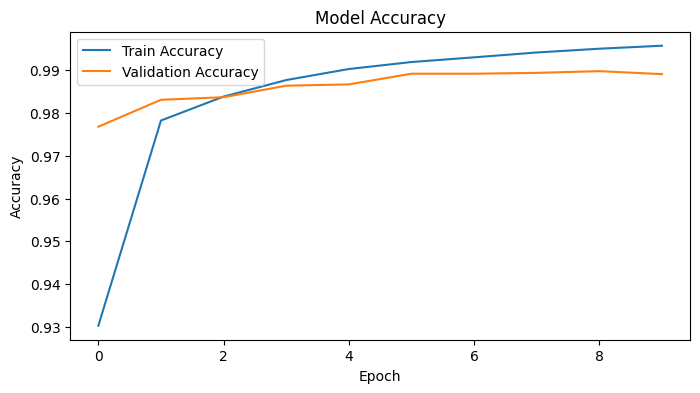

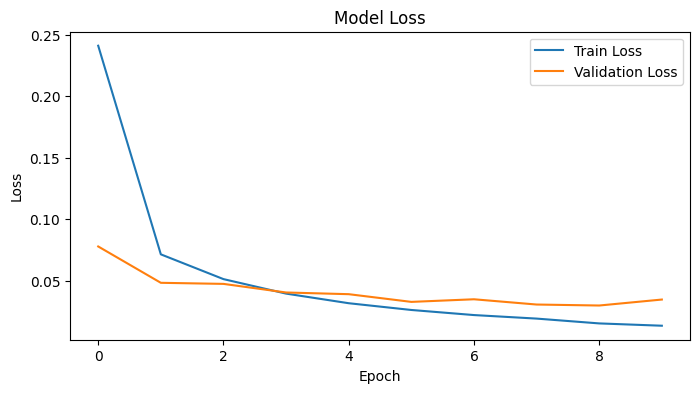

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


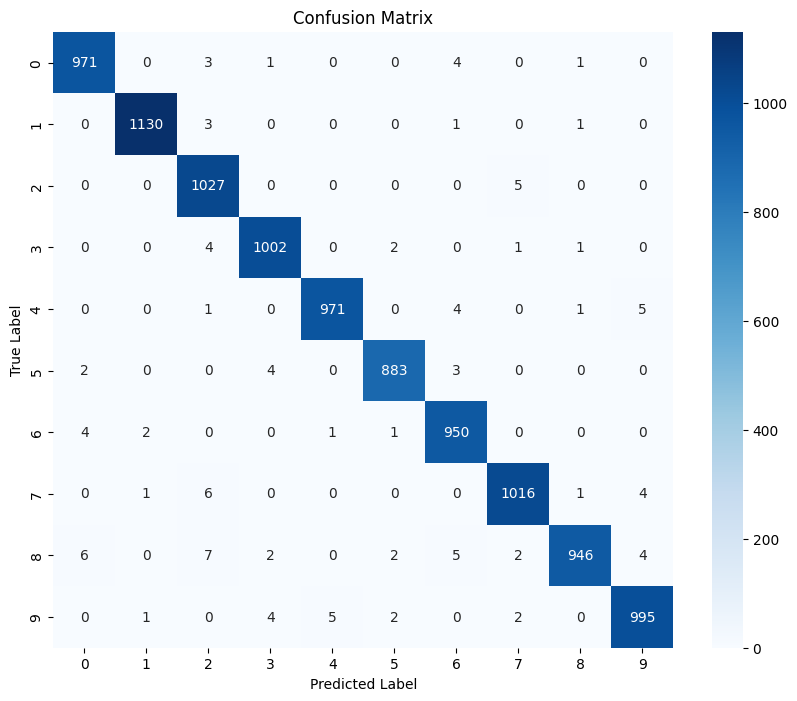

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Import necessary libraries
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set image data format
K.set_image_data_format('channels_last')

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize sample images
plt.figure(figsize=(6, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.show()

# Reshape data to 'NHWC' format
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize the data
X_train /= 255
X_test /= 255

# One-hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Define CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build and fit the model
model = cnn_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))

# Additional Visualizations and Statistical Analysis

# Plot training & validation accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_classes, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred))


## Baseline Model with Multi-Layer Perceptrons

Do we really need a complex model like a convolutional neural network to get the best results with MNIST?

You can get very good results using a very simple neural network model with a single hidden layer. In this section we will create a simple multi-layer perceptron model that achieves an error rate of 1.80%. We will use this as a baseline for comparing more complex convolutional neural network models.

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

We can do this transform easily using the [reshape() function](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.reshape.html) on the NumPy array. We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by Keras anyway.

In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

We are now ready to create our simple neural network model. We will define our model in a function. This is handy if you want to extend the example later and try and get a better score.

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer.

A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.

We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.

Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
5s - loss: 0.2865 - acc: 0.9182 - val_loss: 0.1405 - val_acc: 0.9584
Epoch 2/10
4s - loss: 0.1129 - acc: 0.9670 - val_loss: 0.0937 - val_acc: 0.9714
Epoch 3/10
4s - loss: 0.0730 - acc: 0.9790 - val_loss: 0.0791 - val_acc: 0.9767
Epoch 4/10
4s - loss: 0.0515 - acc: 0.9852 - val_loss: 0.0740 - val_acc: 0.9776
Epoch 5/10
4s - loss: 0.0377 - acc: 0.9896 - val_loss: 0.0683 - val_acc: 0.9785
Epoch 6/10
4s - loss: 0.0271 - acc: 0.9927 - val_loss: 0.0621 - val_acc: 0.9807
Epoch 7/10
4s - loss: 0.0210 - acc: 0.9945 - val_loss: 0.0581 - val_acc: 0.9824
Epoch 8/10
4s - loss: 0.0137 - acc: 0.9972 - val_loss: 0.0600 - val_acc: 0.9811
Epoch 9/10
4s - loss: 0.0111 - acc: 0.9977 - val_loss: 0.0541 - val_acc: 0.9819
Epoch 10/10
4s - loss: 0.0083 - acc: 0.9986 - val_loss: 0.0594 - val_acc: 0.9820
Baseline Error: 1.80%


Running the example might take a few minutes when run on a CPU. This very simple network defined in very few lines of code achieves a respectable error rate of 1.80%.

## Simple Convolutional Neural Network for MNIST

Now that we have seen how to load the MNIST dataset and train a simple multi-layer perceptron model on it, it is time to develop a more sophisticated convolutional neural network or CNN model.

Keras does provide a lot of capability for creating [convolutional neural networks](https://keras.io/layers/convolutional/).

In this section we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

The first step is to import the classes and functions needed.

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Next we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

As before, it is a good idea to normalize the pixel values to the range 0 and 1 and one hot encode the output variables.

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Next we define our neural network model.

Convolutional neural networks are more complex than standard multi-layer perceptrons, so we will start by using a simple structure to begin with that uses all of the elements for state of the art results. Below summarizes the network architecture.

1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].

2. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.

3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.

4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.

5. Next a fully connected layer with 128 neurons and rectifier activation function.

6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

As before, the model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

We evaluate the model the same way as before with the multi-layer perceptron. The CNN is fit over 10 epochs with a batch size of 200.

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
86s - loss: 0.2538 - acc: 0.9279 - val_loss: 0.0860 - val_acc: 0.9750
Epoch 2/10
82s - loss: 0.0766 - acc: 0.9770 - val_loss: 0.0601 - val_acc: 0.9802
Epoch 3/10
82s - loss: 0.0546 - acc: 0.9834 - val_loss: 0.0450 - val_acc: 0.9856
Epoch 4/10
82s - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0360 - val_acc: 0.9880
Epoch 5/10
82s - loss: 0.0339 - acc: 0.9896 - val_loss: 0.0389 - val_acc: 0.9879
Epoch 6/10
81s - loss: 0.0286 - acc: 0.9909 - val_loss: 0.0324 - val_acc: 0.9897
Epoch 7/10
80s - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0330 - val_acc: 0.9891
Epoch 8/10
83s - loss: 0.0186 - acc: 0.9938 - val_loss: 0.0316 - val_acc: 0.9894
Epoch 9/10
83s - loss: 0.0166 - acc: 0.9948 - val_loss: 0.0357 - val_acc: 0.9889
Epoch 10/10
82s - loss: 0.0143 - acc: 0.9957 - val_loss: 0.0322 - val_acc: 0.9902
Baseline Error: 0.98%


Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classification error rate is printed.

Epochs may take 60 to 90 seconds to run on the CPU, or about 15 minutes in total depending on your hardware. You can see that the network achieves an error rate of 0.98, which is better than our simple multi-layer perceptron model above.

## Larger Convolutional Neural Network for MNIST

Now that we have seen how to create a simple CNN, let’s take a look at a model capable of close to state of the art results.

We import classes and function then load and prepare the data the same as in the previous CNN example.

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

This time we define a large CNN architecture with additional convolutional, max pooling layers and fully connected layers. The network topology can be summarized as follows.

1. Convolutional layer with 30 feature maps of size 5×5.
2. Pooling layer taking the max over 2*2 patches.
3. Convolutional layer with 15 feature maps of size 3×3.
4. Pooling layer taking the max over 2*2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

In [ ]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Like the previous two experiments, the model is fit over 10 epochs with a batch size of 200.

In [ ]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
89s - loss: 0.3905 - acc: 0.8782 - val_loss: 0.0822 - val_acc: 0.9746
Epoch 2/10
88s - loss: 0.1010 - acc: 0.9700 - val_loss: 0.0517 - val_acc: 0.9817
Epoch 3/10
88s - loss: 0.0746 - acc: 0.9766 - val_loss: 0.0435 - val_acc: 0.9863
Epoch 4/10
88s - loss: 0.0616 - acc: 0.9806 - val_loss: 0.0374 - val_acc: 0.9872
Epoch 5/10
88s - loss: 0.0522 - acc: 0.9838 - val_loss: 0.0306 - val_acc: 0.9903
Epoch 6/10
88s - loss: 0.0458 - acc: 0.9865 - val_loss: 0.0332 - val_acc: 0.9897
Epoch 7/10
88s - loss: 0.0421 - acc: 0.9870 - val_loss: 0.0302 - val_acc: 0.9906
Epoch 8/10
1923s - loss: 0.0391 - acc: 0.9877 - val_loss: 0.0304 - val_acc: 0.9903
Epoch 9/10
93s - loss: 0.0356 - acc: 0.9886 - val_loss: 0.0271 - val_acc: 0.9909
Epoch 10/10
89s - loss: 0.0315 - acc: 0.9899 - val_loss: 0.0287 - val_acc: 0.9913
Baseline Error: 0.87%


Running the example prints accuracy on the training and validation datasets each epoch and a final classification error rate.

The model takes about 100 seconds to run per epoch. This slightly larger model achieves the respectable classification error rate of 0.87%.

This is not an optimized network topology. Nor is a reproduction of a network topology from a recent paper. There is a lot of opportunity for you to tune and improve upon this model.